In [1]:
import networkx as nx
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score

import numpy as np
import pandas as pd
from datetime import datetime

from collections import Counter
import itertools

from math import comb, ceil
import random
import string

from tqdm import tqdm

import multiprocessing as mp

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

In [3]:
with open('../data/results_09_07_2024_10_39_26.pkl', 'rb') as f:
    results = pickle.load(f)

In [52]:
results[0]['track'][0]

{'count_unique_belief_networks': 20,
 'cluster_count': 2,
 'silhouette_score': 0.11632181529418958,
 'preference_congruence': 0.22475524038616748,
 'preference_similarity': 0.0711576731054829,
 'interpretative_dist': 0.0045175435897213964,
 'internal_energy': 0.006933645106336686}

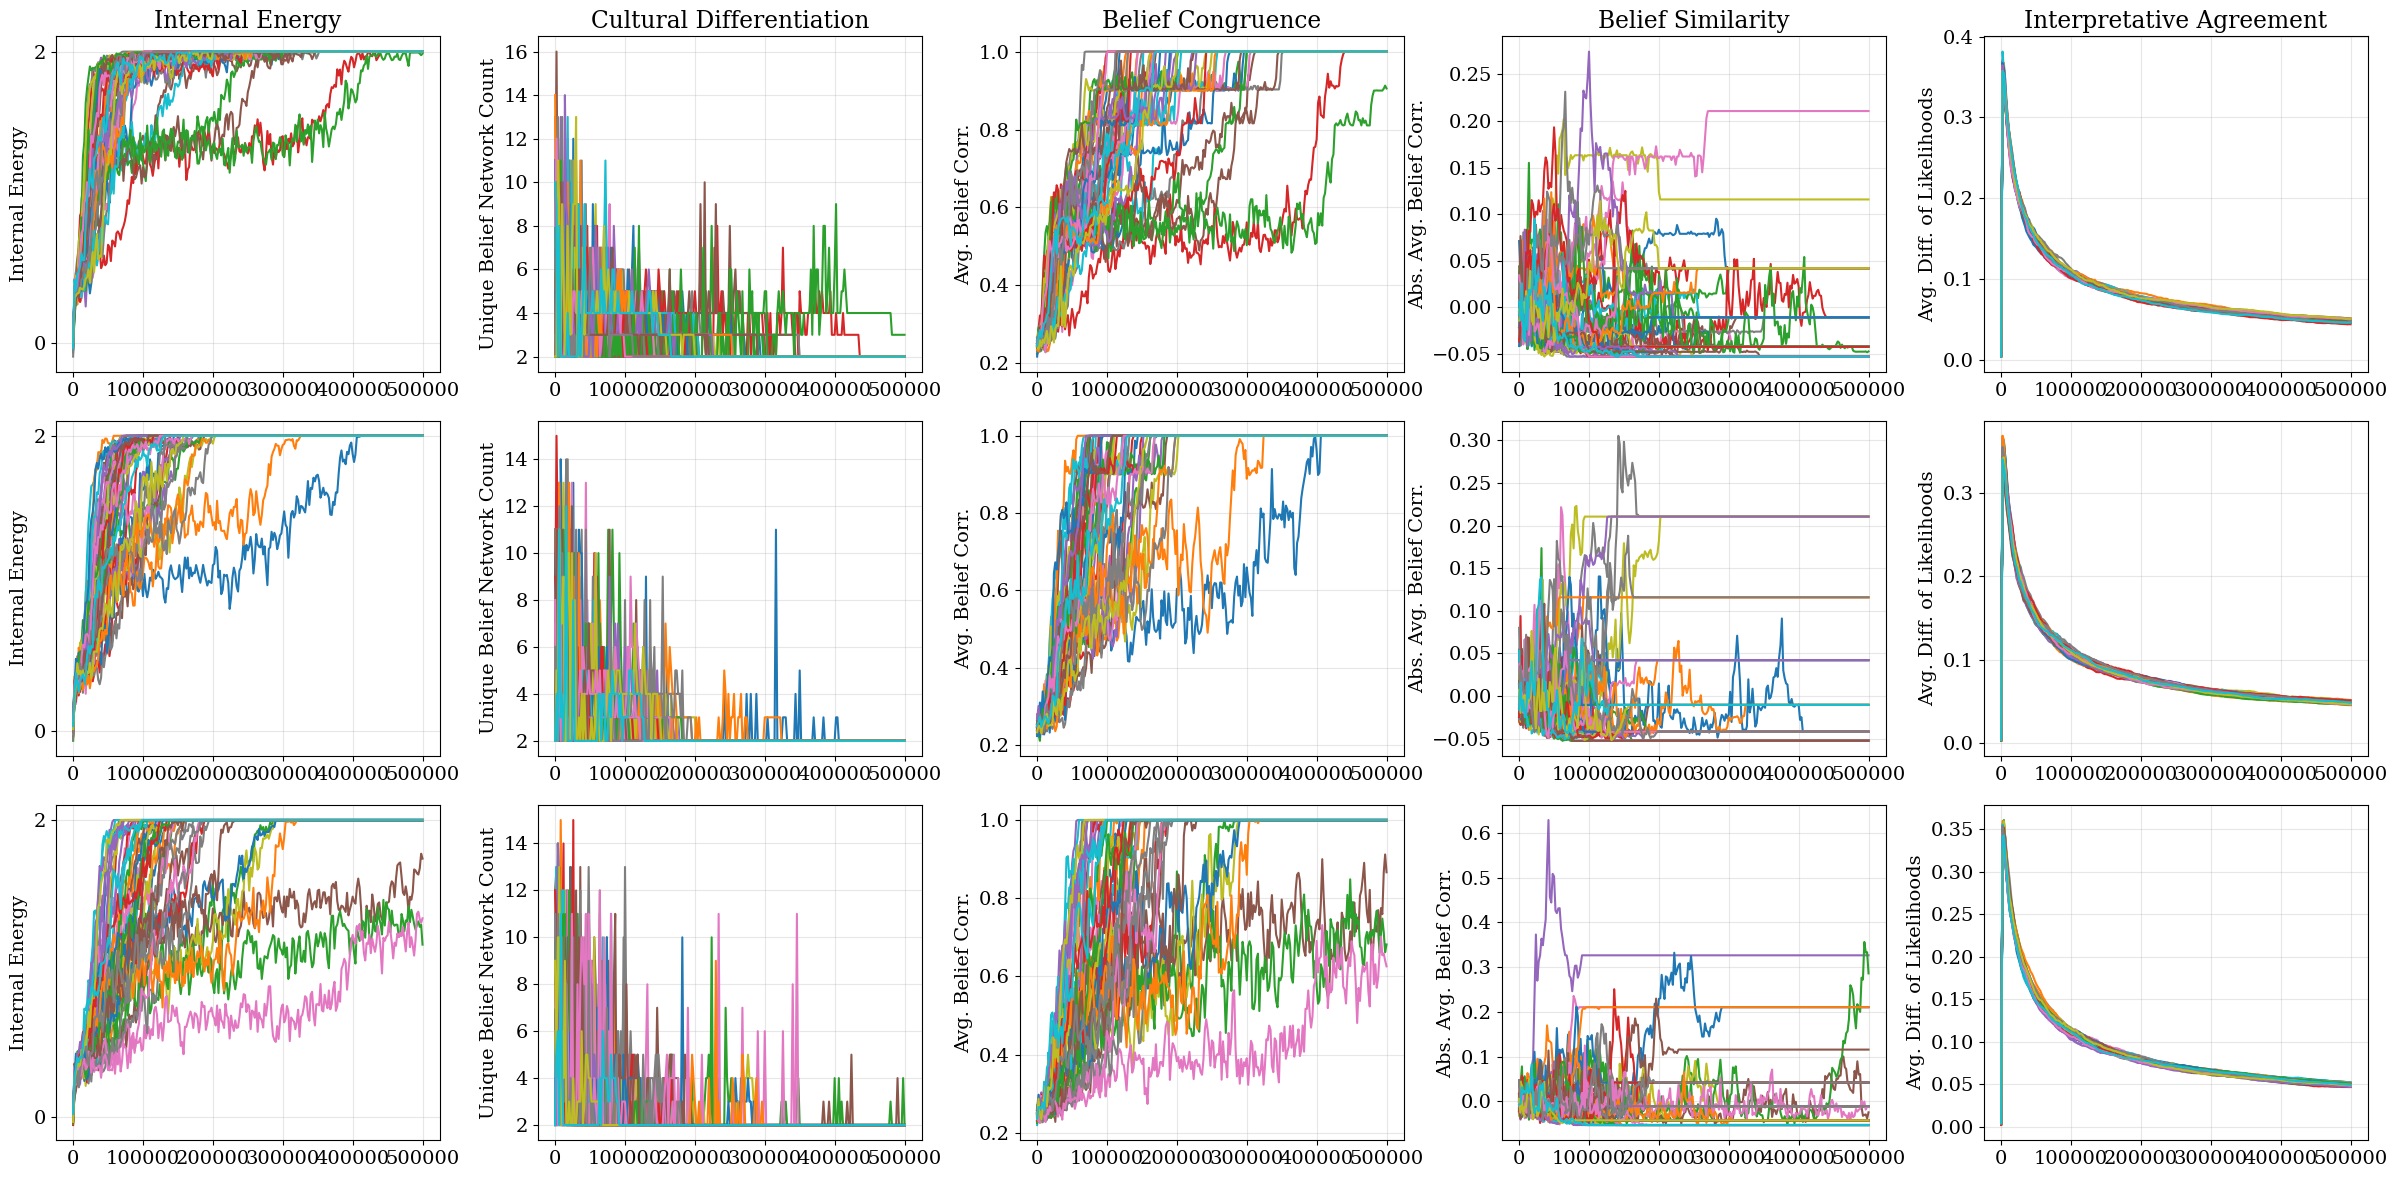

In [53]:
fig, axs = plt.subplots(3,5,figsize=(24,12))
metrics = ['internal_energy','cluster_count', 'preference_congruence', 'preference_similarity', 'interpretative_dist']
ylabels = ['Internal Energy','Unique Belief Network Count', 'Avg. Belief Corr.', 'Abs. Avg. Belief Corr.', 'Avg. Diff. of Likelihoods']
titles = ['Internal Energy','Cultural Differentiation', 'Belief Congruence', 'Belief Similarity', 'Interpretative Agreement']
index = [0,1,2,3,4]

for s1, s2, row in [[0, 50, 0], [100, 150, 1], [250, 300, 2]]:

    results_df = pd.DataFrame([r['track'] for r in results][s1:s2]).T

    for col_idx, metric, ylabel, title in zip(index, metrics, ylabels, titles):
        for col in [*results_df.columns]:
            axs[row][col_idx].plot(results_df[col].apply(lambda x: x[metric]))
        
        axs[row][col_idx].grid(alpha=.3)
        axs[row][col_idx].set_ylabel(ylabel)

    loc = plticker.MultipleLocator(base=2)
    axs[row][0].yaxis.set_major_locator(loc)

for col_idx in index:
    axs[0][col_idx].set_title(titles[col_idx])

fig.tight_layout()
fig.show()